In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('BreadBasket_DMS.csv', parse_dates=True)

In [26]:
multiple_orders = []
seen = []
for num_transaction in transactions.values:
    if num_transaction not in seen:
        seen.append(num_transaction)
        multiple_orders.append('SINGLE')
    elif num_transaction in seen:
        multiple_orders.append('MULTIPLE')

for x in range(len(multiple_orders)):
    if multiple_orders[x] == 'MULTIPLE':
        multiple_orders[x-1] = 'MULTIPLE'
    
        
items = data.groupby('Item')
transactions = data['Transaction']
data['MULTIPLE'] = multiple_orders

    
    
    

In [27]:
multiple_order_data = data[data['MULTIPLE'] == 'MULTIPLE']

In [28]:
mult_items = multiple_order_data.groupby('Item')

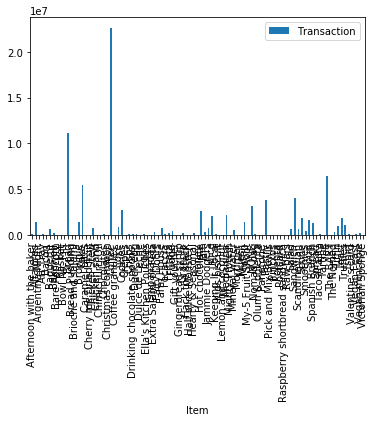

In [29]:
mult_items.sum().plot.bar()

In [30]:
mult_items_sum = mult_items.sum()

In [31]:
narrow_mult_items_sum = mult_items_sum[mult_items_sum['Transaction'] > 500]
narrow_mult_items_sum = narrow_mult_items_sum.sort_values('Transaction', ascending=False)

<Figure size 1440x720 with 0 Axes>

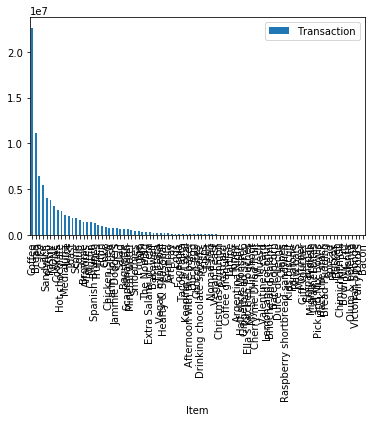

<Figure size 1440x720 with 0 Axes>

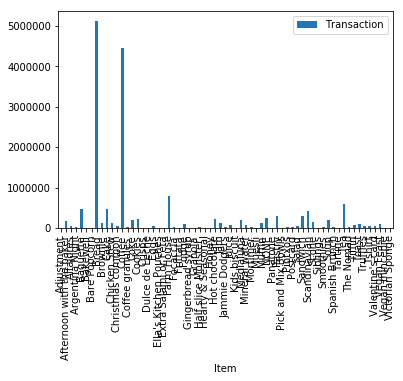

In [32]:
plt.figure(figsize = (20, 10))
narrow_mult_items_sum.plot.bar()
plt.figure(figsize = (20, 10))
single_items_sum_narrowed.plot.bar()

In [33]:
single_items = data[data['MULTIPLE'] == 'SINGLE']

In [34]:
single_items_sum = single_items.groupby('Item').sum()

In [35]:
single_items_sum_narrowed = single_items_sum[single_items_sum['Transaction'] >=100]
single_items_sum_narrowed.sort_values('Transaction', ascending=False)

,Transaction
Item,
Bread,5125773
Coffee,4457203
Farm House,790391
Tea,600473
Cake,478568
Baguette,463256
Scandinavian,421771
Sandwich,303655
Pastry,301051


In [39]:
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
data['Day of Week'] = data['Date'].dt.weekday_name

In [54]:
data['Transaction'] = data['Transaction']/data['Transaction']

In [55]:
week_day_data = data.groupby('Day of Week')

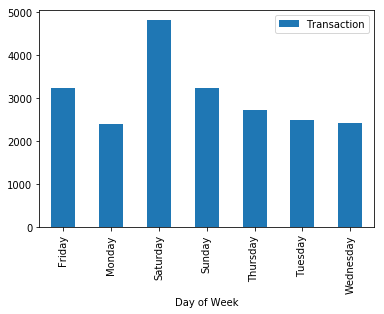

In [59]:
week_day_data.sum().plot.bar()

In [67]:
def time_to_group(time):
    time = str(time)
    if time <'10:00:00':
        return 'Morning'
    elif '10:00'<time<'12:00':
        return 'Brunch'
    elif '12:00'<time<'3:00':
        return 'Lunch'
    else:
        return 'Dinner'

In [70]:
data['Time_of_day'] = data['Time'].apply(time_to_group)

In [77]:
data.head()

,Date,Time,Transaction,Item,MULTIPLE,Day of Week,Time_of_day
0,2016-10-30,09:58:11,1.0,Bread,SINGLE,Sunday,Morning
1,2016-10-30,10:05:34,1.0,Scandinavian,MULTIPLE,Sunday,Brunch
2,2016-10-30,10:05:34,1.0,Scandinavian,MULTIPLE,Sunday,Brunch
3,2016-10-30,10:07:57,1.0,Hot chocolate,MULTIPLE,Sunday,Brunch
4,2016-10-30,10:07:57,1.0,Jam,MULTIPLE,Sunday,Brunch


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1234b77b8>,
      dtype=object)

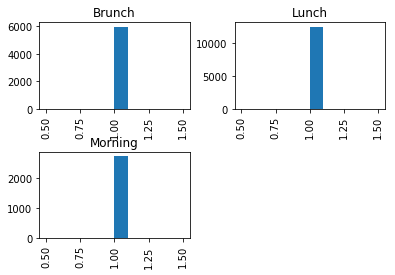

In [78]:
data.hist(column ='Transaction', by='Time_of_day' )

In [109]:
multi_groupby = data.groupby(['Item', 'Time']).sum()

In [110]:
filtered_groupby = multi_groupby[multi_groupby['Transaction'] > 300]

In [184]:
def time_cat_to_time(time):
    time = time.strip()
    if time == 'Morning':
        time = pd.to_datetime('9:00')
        
    if time == 'Brunch':
        time = pd.to_datetime('11:00')
    elif time == 'Lunch':
        time = pd.to_datetime('13:00')
    return time.hour

In [185]:
data['grouped_time'] = data['Time_of_day'].apply(time_cat_to_time)

In [186]:
data.head(2)

,Date,Time,Transaction,Item,MULTIPLE,Day of Week,Time_of_day,grouped_time
0,2016-10-30,09:58:11,1.0,Bread,SINGLE,Sunday,Morning,9
1,2016-10-30,10:05:34,1.0,Scandinavian,MULTIPLE,Sunday,Brunch,11


In [194]:
grouped_data = data.groupby(['Item','Day of Week', 'grouped_time']).sum()

In [197]:
masked_grouped_data = grouped_data[grouped_data['Transaction'] > 100]

In [189]:
no_index_grouped = masked_grouped_data.reset_index()

In [199]:
unstacked = masked_grouped_data.unstack(level = 0)

In [200]:
unstacked.sort_index(ascending=True)

Transaction                                     
Item                           Bread   Cake Coffee   NONE Sandwich    Tea
Day of Week grouped_time                                                 
Friday      9                  118.0    NaN  178.0    NaN      NaN    NaN
            11                 149.0    NaN  250.0    NaN      NaN    NaN
            13                 260.0    NaN  426.0    NaN    109.0  136.0
Monday      9                    NaN    NaN  108.0    NaN      NaN    NaN
            11                   NaN    NaN  223.0    NaN      NaN    NaN
            13                 212.0    NaN  350.0    NaN      NaN  127.0
Saturday    9                  145.0    NaN  146.0    NaN      NaN    NaN
            11                 253.0    NaN  371.0    NaN      NaN    NaN
            13                 362.0  177.0  586.0  107.0    142.0  209.0
Sunday      11                 195.0    NaN  309.0    NaN      NaN    NaN
            13                 248.0  124.0  460.0    NaN      NaN  122.0
Thursday    9                    NaN    NaN  109.0    NaN      NaN    NaN
            11                 121.0    NaN  187.0    NaN      NaN    NaN
            13                 245.0    NaN  374.0    NaN      NaN  118.0
Tuesday     11                 111.0    NaN  229.0    NaN      NaN    NaN
            13                 181.0  113.0  384.0    NaN      NaN  131.0
Wednesday   9                    NaN    NaN  101.0    NaN      NaN    NaN
            11                 120.0    NaN  197.0    NaN      NaN    NaN
            13                 207.0    NaN  330.0    NaN      NaN  136.0

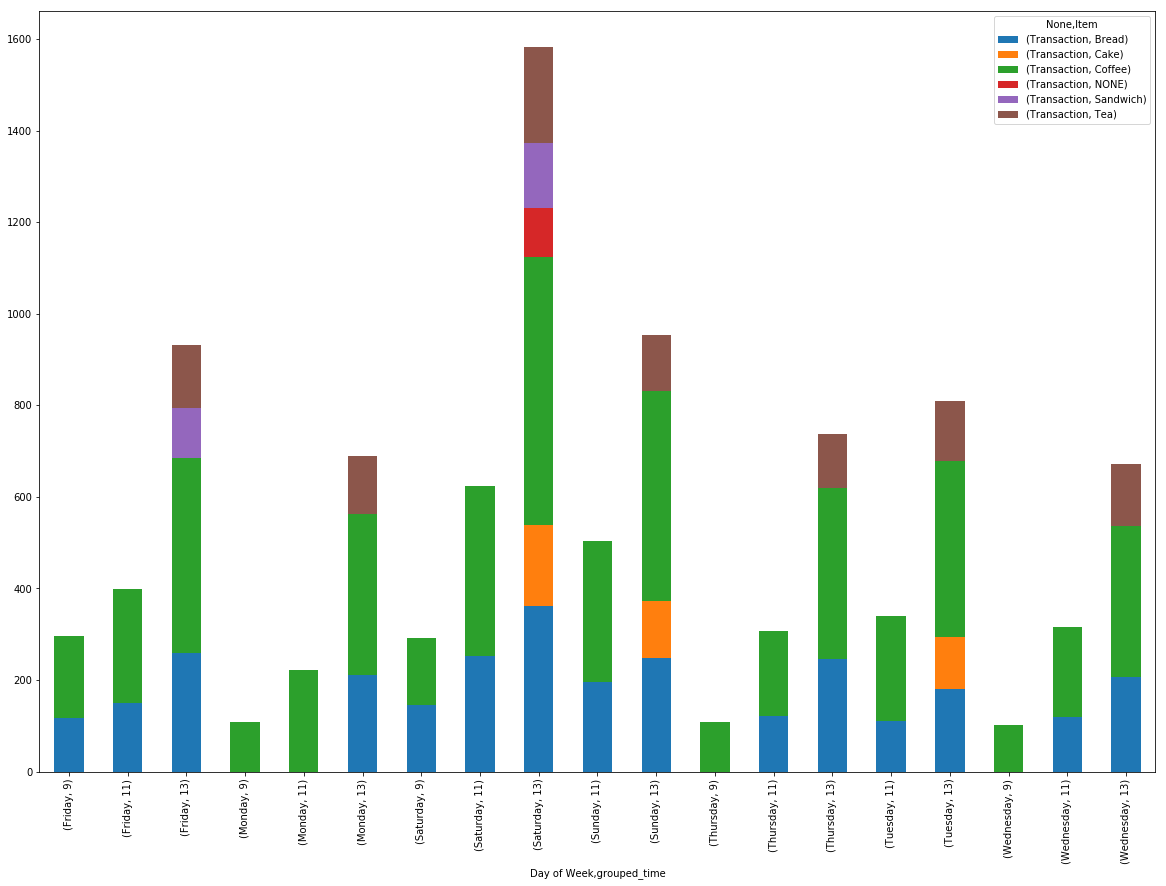

In [202]:
unstacked.plot.bar(figsize = (20,14), stacked=True)